In [151]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [152]:
# Parameters

V_m = 80
L = 11
rho_m = 250
nx = 51
dt = 0.001


x = np.linspace(0, L, nx)
dx = L/(nx-1)
print(dx)

# Initial Conditions

rho0 = np.ones(nx)*10
rho0[10:20] = 50

# Boundary Conditions

r0 = 10

0.22


In [153]:
def F(rho, rho_max, Vmax):
    
    F = Vmax*rho*(1-(rho/rho_max))
    
    return F

In [154]:
def Traffic_flux(nx,nt,rho,dt,dx,rho_max,V_max,x,r0):
    
    # Storing the variables
    v = np.zeros(nx)
    rho_n = np.ones(nx)
    
    for i in range(nt):
        rho_n = rho.copy()
        rho[1:] = rho_n[1:] + dt/dx*(F(rho_n[1:],rho_max,V_max) -\
                                     F(rho_n[0:-1],rho_max,V_max))
        rho[0] = r0
        v[0:] = F(rho[0:],rho_max,V_max)/rho[0:]
        
    plt.figure
    plt.plot(x,v)
    plt.xlabel("x")
    plt.ylabel("V")
    plt.show()
        
    return rho, rho_n, v

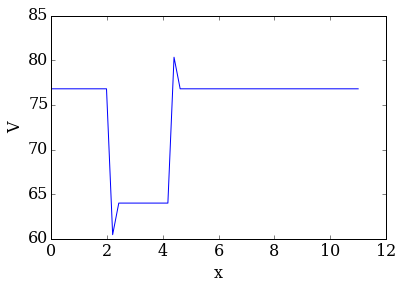

In [155]:
rho, r, v = Traffic_flux(nx,1,rho0,dt,dx,rho_m,V_m,x,r0)

In [156]:
print(min(v)*1000/3600)

16.7951515152


In [157]:
print(np.sum(v)/nx*1000/3600)

20.6361655773


In [158]:
#plt.plot(x,v)